fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64
Accuracy: 0.68


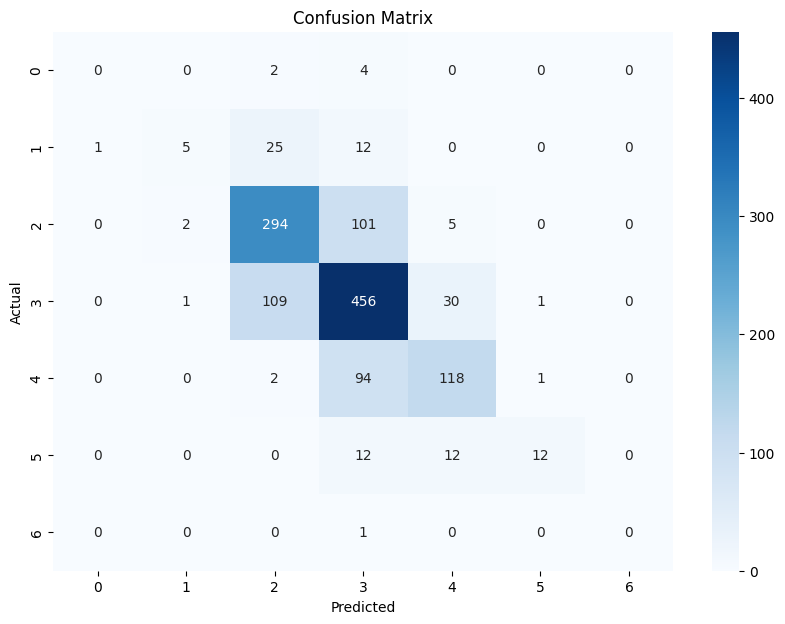

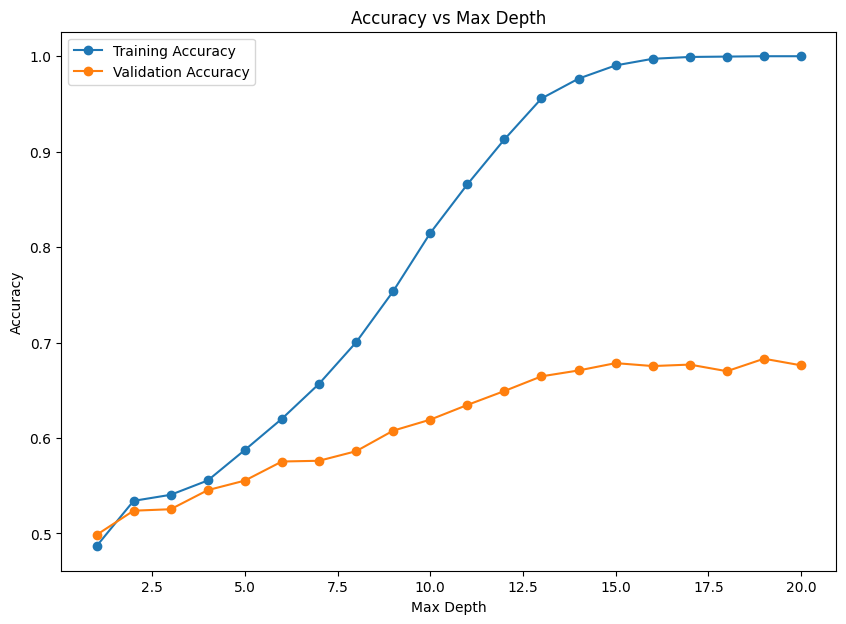

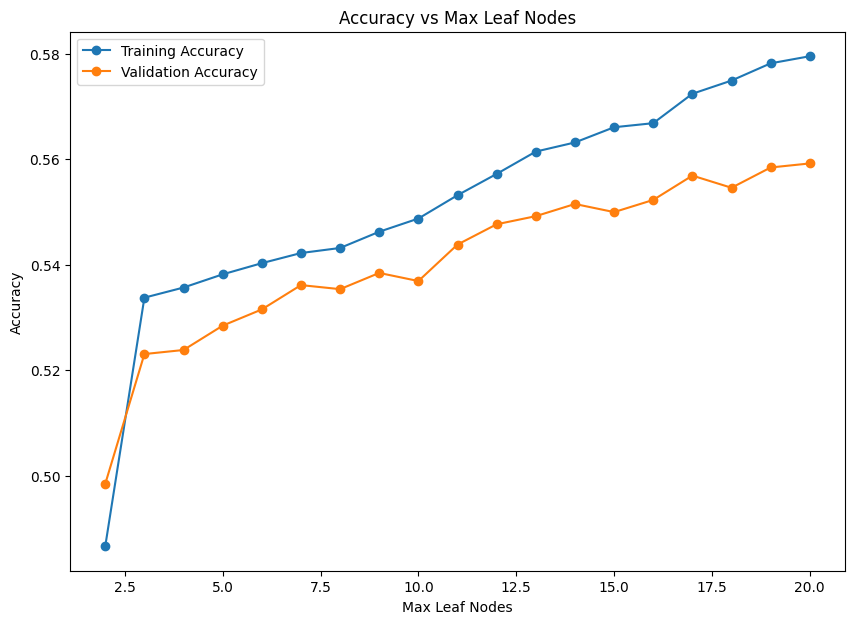

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

red_wine = pd.read_csv(url_red, sep=';')
white_wine = pd.read_csv(url_white, sep=';')

red_wine['type'] = 'red'
white_wine['type'] = 'white'

data = pd.concat([red_wine, white_wine], ignore_index=True)

print(data.isnull().sum())

X = data.drop('quality', axis=1)
y = data['quality']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns[:-1]),
        ('cat', OneHotEncoder(), ['type'])
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

max_depths = range(1, 21)
train_accuracies_max_depth = []
val_accuracies_max_depth = []

for max_depth in max_depths:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(max_depth=max_depth, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    train_accuracies_max_depth.append(accuracy_score(y_train, y_train_pred))
    val_accuracies_max_depth.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 7))
plt.plot(max_depths, train_accuracies_max_depth, marker='o', label='Training Accuracy')
plt.plot(max_depths, val_accuracies_max_depth, marker='o', label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.show()

max_leaf_nodes_values = range(2, 21)
train_accuracies_max_leaf_nodes = []
val_accuracies_max_leaf_nodes = []

for max_leaf_nodes in max_leaf_nodes_values:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    train_accuracies_max_leaf_nodes.append(accuracy_score(y_train, y_train_pred))
    val_accuracies_max_leaf_nodes.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 7))
plt.plot(max_leaf_nodes_values, train_accuracies_max_leaf_nodes, marker='o', label='Training Accuracy')
plt.plot(max_leaf_nodes_values, val_accuracies_max_leaf_nodes, marker='o', label='Validation Accuracy')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Leaf Nodes')
plt.legend()
plt.show()
